# Métodos de regularización en regresión lineal

## Regresión Ridge y LASSO

### Victor Daniel Alvarado Estrella

## Preliminares

En el modelo de regresión lineal, suponemos que hay una variable de respuesta $y$ que puede ser descrita a través de una combinación lineal de variables explicativas $X_1, X_2, \ldots, X_p$
$$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip} + \epsilon_i, \qquad i = 1, 2, \ldots, n.$$
Aquí, $\beta_0, \beta_1, \beta_2, \ldots, \beta_p$ son los (desconocidos) coeficientes de regresión y $\epsilon_i$ son errores aleatorios independientes e idénticamente distribuidos con distribución $N(0, \sigma^2)$. El modelo de regresión puede ser escrito de manera más compacta como 
$$y = X\beta + \epsilon.$$

### Mínimos cuadrados ordinarios

Bajo las suposiciones anteriores, los coeficientes de regresión pueden ser estimados minimizando la suma de los residuos cuadráticos
\begin{align*}
\hat{\beta} &= \underset{\beta}{\text{arg min }}\sum_{i = 1}^{n} \left(y_i - \beta_0 - \beta_1 x_{i1} - \beta_2 x_{i2} - \ldots - \beta_p x_{ip}\right)^2 \\
&= \underset{\beta}{\text{arg min }}\|y - X\beta\|_2^2.
\end{align*}
La solución analítica es
$$\hat{\beta} = (X^T X)^{-1} X^T y.$$

### Multicolinealidad

Cuando hay presencia de multicolinealidad en los datos, los estimadores por mínimos cuadrados se vuelven mal condicionados. Cuando esto ocurre, pequeños cambios en los datos pueden producir grandes cambios en los coeficientes; los coeficientes de regresión tienden a tener varianzas muy grandes, haciendo la estimación pobre; y existe el riesgo de *overfitting*.

<img src="imagenes/Overfitted_Data.png" width="400" height="auto" align="center"/>

Existen distintos métodos para detectar la presencia de multicolinealidad en los datos, entre ellos:
- Calcular el número de condición de la matriz $X^T X$. Un número de condición alto indica la presencia de multicolinealidad.
- Construir la matriz de correlación de las variables explicativas. Valores cercanos a $1$ o $-1$ fuera de la diagonal indican una correlación alta entre los regresores.

## Regresión Ridge

De manera similar a mínimos cuadrados, la regresión Ridge minimiza la suma de los residuos cuadráticos. Sin embargo, Ridge penaliza sumando un múltiplo de la norma al cuadrado del vector de coeficientes.
$$\hat{\beta} = \underset{\beta}{\text{arg min}}\left(\|y - X\beta\|_2^2 + \lambda\|\beta\|^2_2\right).$$
La solución analítica es
$$\hat{\beta} = (X^T X + \lambda I)^{-1} X^T y.$$

## Regresión LASSO

De manera similar a mínimos cuadrados, la regresión LASSO (Least Absolute Shrinkage and Selection Operator) minimiza la suma de los residuos cuadráticos. Sin embargo, LASSO penaliza sumando un múltiplo de la norma 1 del vector de coeficientes.
$$\hat{\beta} = \underset{\beta}{\text{arg min}}\left(\|y - X\beta\|_2^2 + \lambda\|\beta\|_1\right).$$
No obstante, no existe solución analítica, sino que debe resolverse numéricamente. Además, puesto que la función objetivo no es diferenciable en algunos puntos, no podemos utilizar algoritmos que requieren el cálculo del gradiente. Una alternativa es utilizar **Descenso por coordenadas**.

| Descenso por coordenadas (LASSO) |
| :------------------------------- |
| Entrada: Los datos $X$, $y$, una tolerancia $\tau$ y un número máximo de iteraciones $N$. |
| Inicializar $\beta^{(0)} = (X^T X + \lambda I)^{-1} X^T y$. |
| Para $k = 1, 2, \ldots, N$ hacer: |
| 1. $\beta^{(k)} = \beta^{(k - 1)}$. |
| 2. Para $i = 0, 1, ..., p$ resolver el problema de minimización unidimensional: |
| \begin{align*}\beta_i^{(k)} &= \underset{\theta}{\text{arg min}} \left(\lVert y - X\beta\rVert_2^2 + \lambda\lvert\beta\rvert_1\right), \quad \beta = \left(\beta_0^{(k)}, \ldots, \beta_{i - 1}^{(k)}, \theta, \beta_{i + 1}^{(k)}, \ldots, \beta_p^{(k)}\right) \\ &= \begin{cases}\frac{X_i^T \left(y - X_{-i}\beta_{-i}\right) - \frac{\lambda}{2}}{X_i^T X_i}, & \text{si }X_i^T \left(y - X_{-i}\beta_{-i}\right) > \frac{\lambda}{2},\\ \frac{X_i^T \left(y - X_{-i}\beta_{-i}\right) + \frac{\lambda}{2}}{X_i^T X_i}, & \text{si }X_i^T \left(y - X_{-i}\beta_{-i}\right) < -\frac{\lambda}{2},\\ 0, & \text{en caso contrario}.\end{cases}\end{align*} donde $X_{-i}$ denota a la matriz $X$ tras eliminar la $i$-ésima columna, $\beta_{-i}$ al vector $\beta$ tras eliminar la $i$-ésima entrada<br> y $X_i$ la $i$-ésima columna de la matriz $X$. |
| 3. Si $\left\lVert\beta^{(k)} - \beta^{(k - 1)}\right\rVert < p\tau$, terminar y devolver $\beta^{(k)}$. |

### Comparación entre Ridge y LASSO

Equivalentemente, los estimadores Ridge y LASSO se pueden definir como la solución de un problema de minimización con restricción
\begin{align*}
\hat{\beta}_{Ridge} &= \underset{\beta}{\text{arg min }} \|y - X\beta\|_2^2 && \text{sujeto a } \|\beta\|_2^2 \leq c^2, \\
\hat{\beta}_{LASSO} &= \underset{\beta}{\text{arg min }} \|y - X\beta\|_2^2 && \text{sujeto a } \|\beta\|_1 \leq c,
\end{align*}

<img src="imagenes/Lasso-Ridge.png" width="500" height="auto" align="center"/>

Contornos de la función objetivo y la función de restricción para la regresión LASSO (izquierda) y regresión Ridge (derecha). Las áreas en azul son las regiones de restricción $|\beta_1| + |\beta_2| \leq c$ y $\beta_1^2 + \beta_2^2 \leq c^2$, mientras que las elipses en rojo son los contornos de la suma de residuos cuadráticos.

## Validación Cruzada

Hasta el momento hemos visto como estimar los coeficientes de regresión Ridge y LASSO en función del parámetro de regularización $\lambda$. Sin embargo, aún no es claro como escoger el valor de $\lambda$. Un método para esto es validación cruzada.

| Validación cruzada de $K$ iteraciones |
| :------------------------------------ |
| Entrada: Los datos $X$, $y$ y un número de iteraciones $K$. |
| Particionar los datos en $K$ subconjuntos del mismo tamaño. |
| Para $i = 1, 2, \ldots, K$ hacer: |
| 1. Definir el $i$-ésimo subconjunto como conjunto de validación (*Test*). |
| 2. Definir los restantes $K - 1$ subconjuntos como conjunto de entrenamiento (*Train*). |
| 3. Estimar los parámetros del modelo utilizando el conjunto de entrenamiento. |
| 4. Evaluar el desempeño del modelo utilizando el conjunto de validación. En el caso de regresión podemos tomar el error cuadrático medio: $$MSE_i = \frac{1}{\lvert Test \rvert}\sum_{y \in Test}\left(y - \hat{y}\right)^2$$ |
| Devolver el promedio de los errores cuadráticos medios obtenidos: $MSE = \frac{1}{K}\sum_{i = 1}^{K} MSE_i$. |

De esta manera, para escoger un valor de $\lambda$ adecuado, proponemos un conjunto de valores candidatos $\lambda_1, \lambda_2, \ldots, \lambda_N$. Posteriormente, para cada $\lambda_i$ calculamos el error cuadrático medio mediante validación cruzada, y seleccionamos el valor de $\lambda$ que obtuvo el menor valor de entre todos.

<img src="imagenes/CrossValidation.jpg" width="600" height="auto" align="center"/>

## Ejemplo

La medición del porcentaje de grasa (*FAT*) en puercos es un procedimiento costoso, por lo cual es importante investigar si este porcentaje se puede predecir a partir de otras propiedades del puerco de fácil medición. Estas variables son:
- *AVBF* es un promedio de tres mediciones del grosor de grasa en la espalda;
- *MUS* es una puntuación de musculatura para la carcasa. Entre mayor sea este número, hay más músculo y menos grasa;
- *LEA* es una medición del área del lomo;
- *DEP* es un promedio de tres mediciones de la profundidad de la grasa frente a la décima costilla;
- *LWT* es el peso vivo de la carcasa;
- *CWT* es el peso de la carcasa sacrificada;
- *WTWAT* es una medida usada para determinar la gravedad especifica;
- *DPSL* es el promedio de tres determinaciones de la profundidad del vientre;
- *LESL* es la medida promedio de la delgadez de tres secciones transversales del vientre;
- *BELWT* es el peso total del vientre.

In [1]:
import numpy as np
import pandas as pd
from LinearRegression import *

Datos = pd.read_csv('Fat.csv')
X = Datos.drop('FAT', axis = 1)
y = Datos['FAT']

print('Número de observaciones:', X.shape[0])
print('Número de parámetros:', X.shape[1], '+ Intercepto')
print('Número de condición de X.T @ X: %.3e' % np.linalg.cond(X.T @ X))

Número de observaciones: 45
Número de parámetros: 10 + Intercepto
Número de condición de X.T @ X: 1.982e+07


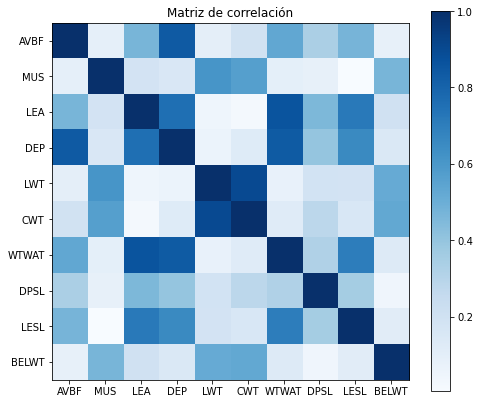

In [2]:
correlation_matrix(X)

In [3]:
# Regresión Ridge.
np.set_printoptions(precision = 3)
lambdas = np.logspace(0, 2, 50)
modelR = RidgeCV(lambdas, n_splits = 9).fit(X, y)

print('lambda: %.3e' % modelR.alpha)
print('Mejor score por validación cruzada: %.3f' % modelR.best_score)
print('Intercepto: %.3f' % modelR.intercept)
print('Coeficientes: ', modelR.coef)
print('Coeficiente de determinación: %.3f' % modelR.score(X, y))
print('Error cuadrático medio: %.3f' % mean_squared_error(y, modelR.predict(X)))

lambda: 3.089e+00
Mejor score por validación cruzada: 9.788
Intercepto: 0.458
Coeficientes:  [ 0.559 -0.98  -0.527  2.478  0.237  0.024 -2.047  0.484 -0.587  1.185]
Coeficiente de determinación: 0.741
Error cuadrático medio: 6.339


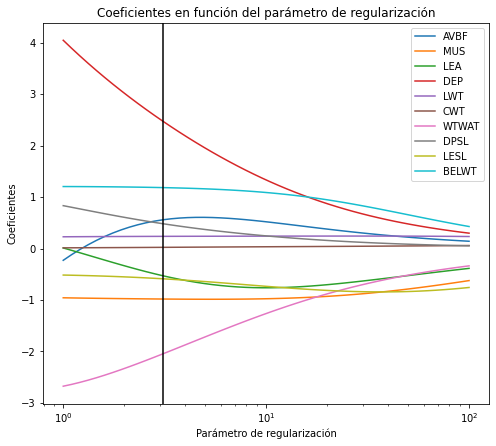

In [4]:
coefficients_as_penalty_function(Ridge, lambdas, X, y, modelR.alpha)

In [5]:
# Regresión LASSO.
lambdas = np.logspace(0, 2, 50)
modelL = LassoCV(lambdas, n_splits = 9).fit(X, y)

print('lambda: %.3e' % modelL.alpha)
print('Mejor score por validación cruzada: %.3f' % modelL.best_score)
print('Intercepto: %.3f' % modelL.intercept)
print('Coeficientes: ', modelL.coef)
print('Coeficiente de determinación: %.3f' % modelL.score(X, y))
print('Error cuadrático medio: %.3f' % mean_squared_error(y, modelL.predict(X)))

lambda: 4.498e+00
Mejor score por validación cruzada: 9.448
Intercepto: 0.000
Coeficientes:  [ 0.    -0.88   0.     5.394  0.21   0.023 -2.084  0.    -0.477  1.177]
Coeficiente de determinación: 0.763
Error cuadrático medio: 5.798


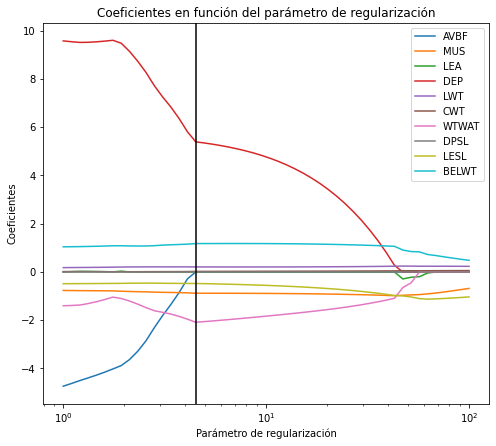

In [6]:
coefficients_as_penalty_function(Lasso, lambdas, X, y, modelL.alpha)